In [35]:
import requests
import urllib

In [59]:
POCKET_ENDPOINT = "https://getpocket.com/v3/"
AUTH_ENDPOINT = POCKET_ENDPOINT + "oauth/"
GET_ENDPOINT = POCKET_ENDPOINT + "get/"
CONSUMER_KEY = "49559-20b53d2752c55436f2e0a399"

In [8]:
%%javascript
IPython.notebook.kernel.execute("NOTEBOOK_URL = '" + window.location.href + "'");

<IPython.core.display.Javascript object>

In [20]:
r = requests.post(AUTH_ENDPOINT + "request", data = {'consumer_key': CONSUMER_KEY, 'redirect_uri': NOTEBOOK_URL})

In [25]:
if r.status_code is not 200:
    print("Error requesting auth code.")
else:
    auth_code = r.text[5:]

In [32]:
print("https://getpocket.com/auth/authorize?request_token={}&redirect_uri={}".format(auth_code, urllib.parse.quote_plus(NOTEBOOK_URL)))

https://getpocket.com/auth/authorize?request_token=8f6432d9-0af7-2bb6-7e14-618ead&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Fnotebooks%2Fnotebooks%2FUntitled.ipynb%3Fkernel_name%3Dpython3


In [37]:
r = requests.post(AUTH_ENDPOINT + "authorize", data = {'consumer_key': CONSUMER_KEY, 'code': auth_code})

In [56]:
result = urllib.parse.parse_qs(r.text)
access_token = result['access_token'][0]
username = result['username'][0]

In [62]:
r = requests.post(GET_ENDPOINT, data = {
        'consumer_key': CONSUMER_KEY,
        'access_token': access_token,
        'state': 'archive'
    })

In [76]:
articles = r.json()['list'].values()

In [65]:
# number of articles read
len(r.json()['list'])

185

In [71]:
# sum of word counts of all articles
word_count_sum = sum([int(a['word_count']) for a in r.json()['list'].values()])

In [72]:
word_count_sum

392104

In [78]:
wait_time_hist = []

for a in articles:
    wait_time_hist.append(int(a['time_read']) - int(a['time_added']))

In [91]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 8

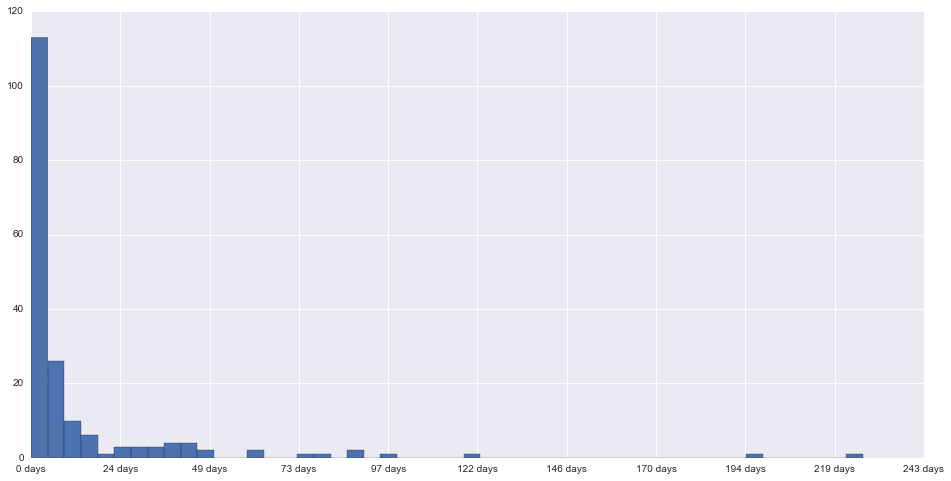

In [164]:
wt_hist = np.array(wait_time_hist)

n, bins, patches = plt.hist(wt_hist / 60, 50)

step = int(plt.xlim()[1] / 10)
x = range(int(plt.xlim()[0]), int(plt.xlim()[1]) + step, step)
labels = ['{:.0f} days'.format(t/60/24) for t in x]
plt.xticks(x, labels)

plt.show()